In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
file3 = pd.read_csv(r'file:///Users/kaan/Desktop/Data_Marketing_Customer_Analysis_Round3.csv')
pd.options.display.max_rows = 10



In [7]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [8]:
numerics = ['int16', 'int32', 'int64'] 
numerical = file3.select_dtypes(include=numerics)
numerical

X = np.array(numerical)

In [9]:
numerical = numerical.dropna()
numerical = numerical.reset_index()
numerical

index  customer_lifetime_value  income  monthly_premium_auto  \
0          0                     4809   48029                    61   
1          1                     2228   92260                    64   
2          2                    14947   22139                   100   
3          3                    22332   49078                    97   
4          4                     9025   23675                   117   
...      ...                      ...     ...                   ...   
10684  10684                    15563   61541                   253   
10685  10685                     5259   61146                    65   
10686  10686                    23893   39837                   201   
10687  10687                    11971   64195                   158   
10688  10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34                             31   
3                           10                              3   
4                           33                             31   
...                        ...                            ...   
10684                       12                             40   
10685                        7                             68   
10686                       11                             63   
10687                        0                             27   
10688                       31                              1   

       number_of_open_complaints  number_of_policies  total_claim_amount  
0                              0                   9                 292  
1                              0                   1                 744  
2                              0                   2                 480  
3                              0                   2                 484  
4                              0                   7                 707  
...                          ...                 ...                 ...  
10684                          0                   7                1214  
10685                          0                   6                 273  
10686                          0                   2                 381  
10687                          4                   6                 618  
10688                          0                   3                1021  

[10689 rows x 9 columns]

In [10]:
X= numerical [['customer_lifetime_value', 'income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numerical ['total_claim_amount']

In [11]:
X
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)
print("X_train", X_train.shape)

X_train (7482, 7)


In [13]:
y = np.array(file3["total_claim_amount"]).reshape(-1,1)

In [77]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

In [78]:
#lm = LinearRegression()
#numerical = lm.fit(X_train_scaled, y_train)
#numerical.coef_


lm = LinearRegression()
numerical = lm.fit(X_train_transformed,y_train_transformed)
print("Slope =", numerical.coef_)
print("Intercept =", numerical.intercept_)

Slope = [[-2.08480481e-02 -1.43758190e-01  4.96258343e-01 -9.76148844e-05
  -5.65452562e-03 -2.11877522e-02  1.97560397e-02]]
Intercept = [-2.98780762e-14]


In [79]:
numerical.intercept_

array([-2.98780762e-14])

In [80]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [81]:
y_pred = numerical.predict(X_test)
y_test - y_pred

/Users/kaan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 8976.99924749],
       [13676.65294834],
       [13391.12704068],
       ...,
       [ 3783.98810043],
       [12560.65032139],
       [ 6626.4982691 ]])

In [82]:
mse(y_test,y_pred)

75143438.98249713

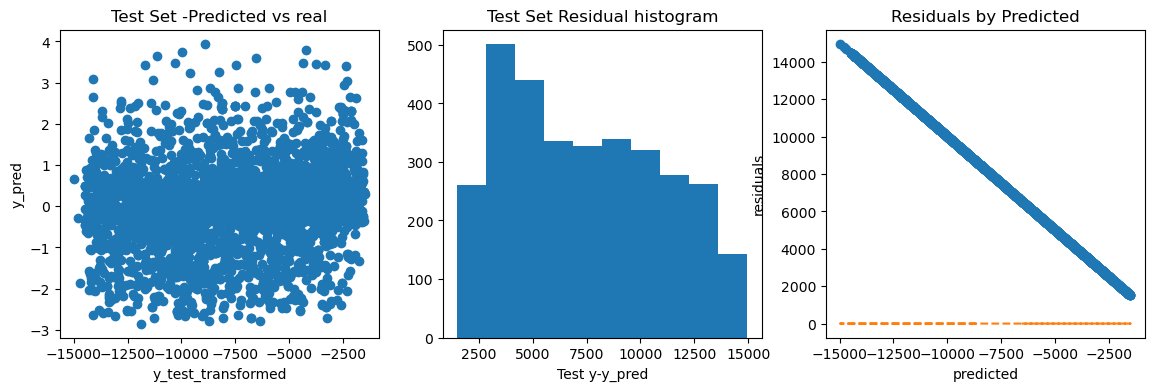

In [83]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Thursday

In [84]:
import pandas as pd
# Define the data
column_names = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
                'months_since_last_claim', 'months_since_policy_inception',
                'number_of_open_complaints', 'number_of_policies']
coef_values = [-2.13594719, -36.7201968 , 161.12276203,   3.5527067 ,
         -2.03301237,  -1.17714444,   1.58807445]
# Create the DataFrame
data_coef_rank = pd.DataFrame({'column_name': column_names, 'coef': coef_values})
# Display the DataFrame
data_coef_rank

column_name        coef
0        customer_lifetime_value   -2.135947
1                         income  -36.720197
2           monthly_premium_auto  161.122762
3        months_since_last_claim    3.552707
4  months_since_policy_inception   -2.033012
5      number_of_open_complaints   -1.177144
6             number_of_policies    1.588074

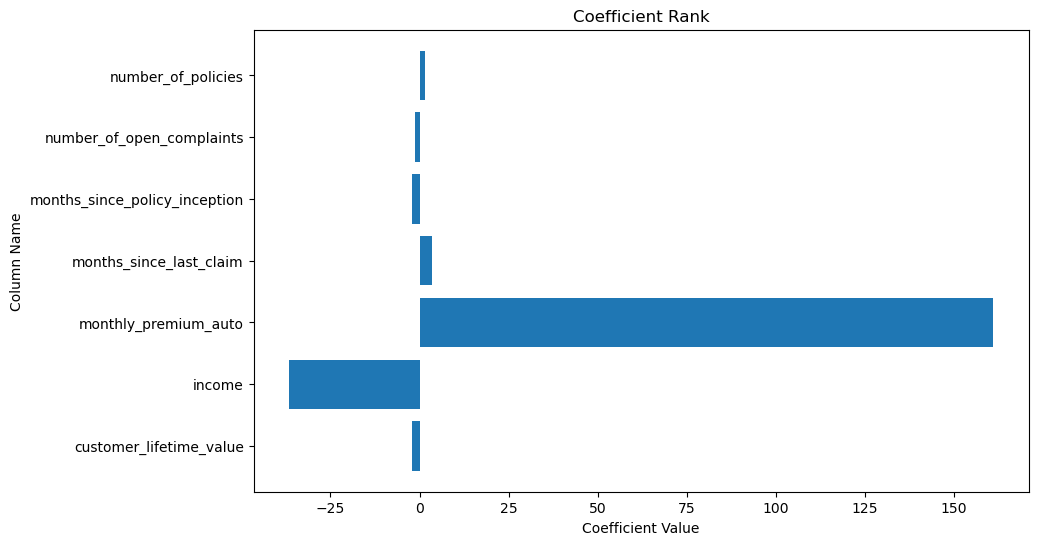

In [85]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar chart
plt.barh(data_coef_rank['column_name'], data_coef_rank['coef'])

# Set the axis labels and title
plt.xlabel('Coefficient Value')
plt.ylabel('Column Name')
plt.title('Coefficient Rank')

# Display the chart
plt.show()


In [86]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 68621011.65198445


In [87]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 7478.042735048866


In [88]:
import math

In [89]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 8283.780034017347


In [90]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = -66209473.46755378


In [91]:
file3

level_0  index       region  customer_lifetime_value response  \
0            0      0      central                     4809       no   
1            1      1  west region                     2228       no   
2            2      2         east                    14947       no   
3            3      3   north west                    22332      yes   
4            4      4   north west                     9025       no   
...        ...    ...          ...                      ...      ...   
10684    10684  10684      central                    15563       no   
10685    10685  10685   north west                     5259       no   
10686    10686  10686      central                    23893       no   
10687    10687  10687  west region                    11971       no   
10688    10688  10688      central                     6857       no   

       coverage education effective_to_date month employment_status  ...  \
0         basic   college           2/18/11   feb          employed  ...   
1         basic   college           1/18/11   jan        unemployed  ...   
2         basic  bachelor           2/10/11   feb          employed  ...   
3      extended   college           1/11/11   jan          employed  ...   
4       premium  bachelor           1/17/11   jan     medical leave  ...   
...         ...       ...               ...   ...               ...  ...   
10684   premium  bachelor           1/19/11   jan        unemployed  ...   
10685     basic   college            1/6/11   jan          employed  ...   
10686  extended  bachelor            2/6/11   feb          employed  ...   
10687   premium   college           2/13/11   feb          employed  ...   
10688     basic  bachelor            1/8/11   jan        unemployed  ...   

      months_since_policy_inception  number_of_open_complaints  \
0                                52                          0   
1                                26                          0   
2                                31                          0   
3                                 3                          0   
4                                31                          0   
...                             ...                        ...   
10684                            40                          0   
10685                            68                          0   
10686                            63                          0   
10687                            27                          4   
10688                             1                          0   

      number_of_policies     policy_type        policy  renew_offer_type  \
0                      9  corporate auto  corporate l3            offer3   
1                      1   personal auto   personal l3            offer4   
2                      2   personal auto   personal l3            offer3   
3                      2  corporate auto  corporate l3            offer2   
4                      7   personal auto   personal l2            offer1   
...                  ...             ...           ...               ...   
10684                  7   personal auto   personal l1            offer3   
10685                  6   personal auto   personal l3            offer2   
10686                  2  corporate auto  corporate l3            offer1   
10687                  6   personal auto   personal l1            offer1   
10688                  3   personal auto   personal l1            offer4   

       sales_channel  total_claim_amount  vehicle_class vehicle_size  
0              agent                 292  four-door car      medsize  
1        call center                 744  four-door car      medsize  
2        call center                 480            suv      medsize  
3             branch                 484  four-door car      medsize  
4             branch                 707  four-door car      medsize  
...              ...                 ...            ...          ...  
10684            web      

In [92]:
file3 = file3.reset_index()
file3.head()

ValueError: cannot insert level_0, already exists

In [93]:
y = np.array(file3["total_claim_amount"]).reshape(-1,1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [95]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [96]:
pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

In [97]:
lm = LinearRegression()
model = lm.fit(X_train_transformed,y_train_transformed)
print("Slope =", model.coef_)
print("Intercept =", model.intercept_)

Slope = [[-2.08480481e-02 -1.43758190e-01  4.96258343e-01 -9.76148844e-05
  -5.65452562e-03 -2.11877522e-02  1.97560397e-02]]
Intercept = [-2.98780762e-14]


In [98]:
y_pred = model.predict(X_test_transformed)
compare = pd.DataFrame({'y_test':list(y_test_transformed) ,'y_pred': list(y_pred)})
compare

y_test                  y_pred
0     [-0.24396624958434066]   [-0.5329755038427556]
1      [0.26434240768752915]   [0.43784774727757897]
2       [-2.217679240628924]   [0.40376159507645204]
3      [-1.3251063471108266]  [0.014589861264761257]
4       [1.7008351797377181]    [0.9718752095469454]
...                      ...                     ...
3202   [0.22065479805990468]   [-0.9183327212290072]
3203    [0.2409017326320982]    [0.6686653167342367]
3204    [2.2392343647745285]    [1.1509166638082804]
3205   [-1.5646410368808357]   [-0.8757387844982374]
3206   [-1.6164273984937825]  [0.046080302347932124]

[3207 rows x 2 columns]

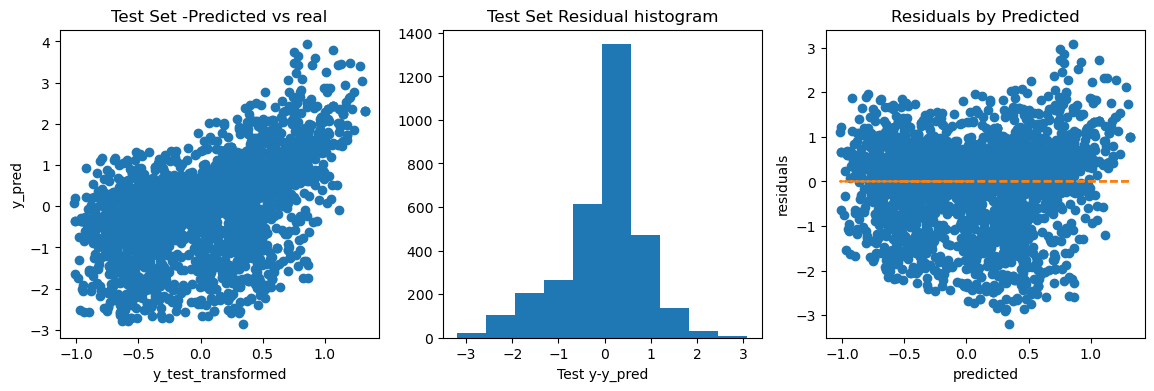

In [99]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [100]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.7637981044286775


In [101]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 0.6295226660494436


In [102]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 0.8739554361800591


In [103]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = 0.2630439296055753


### optional question

In [124]:
file3_copy = file3.copy()
summary= file3_copy.describe()
summary = file3_copy
file3_copy = file3_copy.reset_index(drop=True)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Calculate z-scores for the 'customer_lifetime_value' column
file3_copy['customer_lifetime_value_zscore'] = zscore(file3_copy['customer_lifetime_value'])

# Define the threshold for detecting outliers (e.g., z-score greater than 3)
threshold = 3

# Drop the outliers based on the threshold
file3_copy_without_outliers = file3_copy[file3_copy['customer_lifetime_value_zscore'] < threshold]

# Create a linear regression model
model = LinearRegression()

# Fit the model using the standardized 'customer_lifetime_value' column without outliers
model.fit(file3_copy_without_outliers[['customer_lifetime_value_zscore']], file3_copy_without_outliers['income'])

# Make predictions using the standardized 'customer_lifetime_value' column without outliers
predictions = model.predict(file3_copy_without_outliers[['customer_lifetime_value_zscore']])

# Calculate the R-squared value
r2 = r2_score(file3_copy_without_outliers['income'], predictions)

# Print the R-squared value
print("R-squared value:", r2)

R-squared value: 7.415603285099159e-06
